In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [100]:
def evaluation_with_rmse(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results:\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")

In [ ]:
def evaluation_with_mse(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results:\nMAE: {mae:.2f}, MSE: {mse:.2f}, R2 Score: {r2:.2f}")

In [102]:
pd.set_option('display.max_columns',None)

In [103]:
df=pd.read_csv('cleaned data.csv')
df.head()

,Unnamed: 0,id,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,No of views,house condition(from 5),house grade,house area(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,No of schools nearby,Distance from the airport,Price,date
0,0,6762810635,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,5
1,1,6762810998,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,5
2,2,6762812605,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000,5
3,3,6762812919,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000,5
4,4,6762813105,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000,5


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      14619 non-null  int64  
 1   id                              14619 non-null  int64  
 2   No of bedrooms                  14619 non-null  int64  
 3   No of bathrooms                 14619 non-null  float64
 4   living area                     14619 non-null  int64  
 5   lot area                        14619 non-null  int64  
 6   No of floors                    14619 non-null  float64
 7   waterfront present              14619 non-null  int64  
 8   No of views                     14619 non-null  int64  
 9   house condition(from 5)         14619 non-null  int64  
 10  house grade                     14619 non-null  int64  
 11  house area(excluding basement)  14619 non-null  int64  
 12  Area of the basement            

In [105]:
df=df[['No of bathrooms', 'No of bedrooms', 'living area', 'lot area', 'No of floors', 'waterfront present', 'house condition(from 5)', 'house grade','house area(excluding basement)', 'Area of the basement', 'Built Year','Renovation Year', 'Postal Code','living_area_renov', 'lot_area_renov', 'No of schools nearby','Distance from the airport', 'date', 'Price']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   No of bathrooms                 14619 non-null  float64
 1   No of bedrooms                  14619 non-null  int64  
 2   living area                     14619 non-null  int64  
 3   lot area                        14619 non-null  int64  
 4   No of floors                    14619 non-null  float64
 5   waterfront present              14619 non-null  int64  
 6   house condition(from 5)         14619 non-null  int64  
 7   house grade                     14619 non-null  int64  
 8   house area(excluding basement)  14619 non-null  int64  
 9   Area of the basement            14619 non-null  int64  
 10  Built Year                      14619 non-null  int64  
 11  Renovation Year                 14619 non-null  int64  
 12  Postal Code                     

In [ ]:
X= df.drop(columns=['Price'])
y= df['Price']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
mlr=LinearRegression()
mlr.fit(X_train, y_train)
y_pred=mlr.predict(X_test)

evaluation_with_rmse(y_test, y_pred)

Results:
MAE: 138237.90, RMSE: 223116.08, R2 Score: 0.66


In [108]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

evaluation_with_rmse(y_test, y_pred)

Results:
MAE: 121934.94, RMSE: 187915.35, R2 Score: 0.76


In [109]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred_rig = ridge_reg.predict(X_test)

evaluation_with_rmse(y_test, y_pred)

Results:
MAE: 121934.94, RMSE: 187915.35, R2 Score: 0.76


In [110]:
ridge_reg = Lasso()
ridge_reg.fit(X_train, y_train)
y_pred_rig = ridge_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

evaluation_with_rmse(y_test, y_pred)

Results:
MAE: 121934.94, RMSE: 187915.35, R2 Score: 0.76


d:\Data Science\Projects\Real Estate Price Prediction & Invenstment Insigths\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.382e+14, tolerance: 1.539e+11
  model = cd_fast.enet_coordinate_descent(


In [111]:
ridge_reg = ElasticNet()
ridge_reg.fit(X_train, y_train)
y_pred_rig = ridge_reg.predict(X_test)

evaluation_with_rmse(y_test, y_pred)

Results:
MAE: 121934.94, RMSE: 187915.35, R2 Score: 0.76


d:\Data Science\Projects\Real Estate Price Prediction & Invenstment Insigths\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.135e+14, tolerance: 1.539e+11
  model = cd_fast.enet_coordinate_descent(


In [112]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

evaluation_with_rmse(y_test, y_pred)

Results:
MAE: 121934.94, RMSE: 187915.35, R2 Score: 0.76


In [113]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)

evaluation_with_rmse(y_test, y_pred)

Results:
MAE: 124645.70, RMSE: 230154.13, R2 Score: 0.64


In [114]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

evaluation_with_rmse(y_test, y_pred)

Results:
MAE: 89455.52, RMSE: 162494.72, R2 Score: 0.82


In [115]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

evaluation_with_rmse(y_test, y_pred)

Results:
MAE: 81604.23, RMSE: 149457.82, R2 Score: 0.85


In [116]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0]
}

xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

grid_search = GridSearchCV(xgb_reg, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


In [117]:
xgb_reg = xgb.XGBRegressor(learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

evaluation_with_rmse(y_test, y_pred)

Results:
MAE: 76628.18, RMSE: 138039.31, R2 Score: 0.87


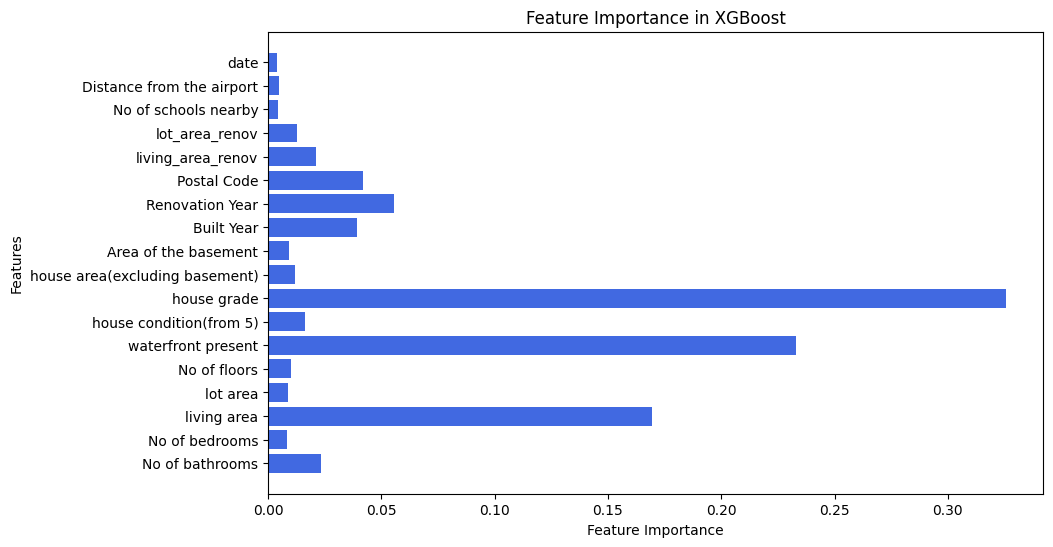

In [118]:
feature_importance = xgb_reg.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importance, color='royalblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost")
plt.show()


In [119]:
print(feature_importance)

[0.02347714 0.008484   0.16947268 0.00862003 0.01005504 0.23309219
 0.01638922 0.32573643 0.01181344 0.00916798 0.03913178 0.05562403
 0.04208677 0.0211356  0.01295622 0.0042081  0.00465479 0.00389455]


### 3️⃣ Performance Metrics of Best Model (xgb_reg)

| Metric | Value |
|---|---|
| MAE (Mean Absolute Error) | 76628.18 |
| RMSE (Root Mean Squared Error) | 138039.31 |
| R² Score | 0.87 |